the original test : https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html#example-plot-cmeans-py

In [4]:
from PFCM import pfcm, pfcm_predict
import numpy as np
import matplotlib.pyplot as plt

In [5]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

Define three cluster centers

In [8]:
centers = [[4, 2],
           [1, 7],
           [5, 6]]

Define three cluster sigmas in x and y, respectively

In [9]:
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

Generate test data

In [10]:
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

Visualize the test data

Text(0.5,1,'Test data: 200 points x3 clusters.')

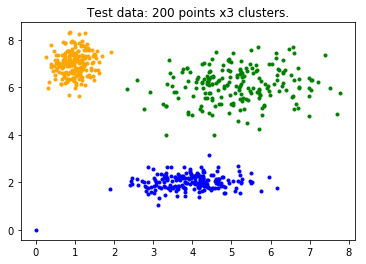

In [11]:
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

Set up the loop and plot

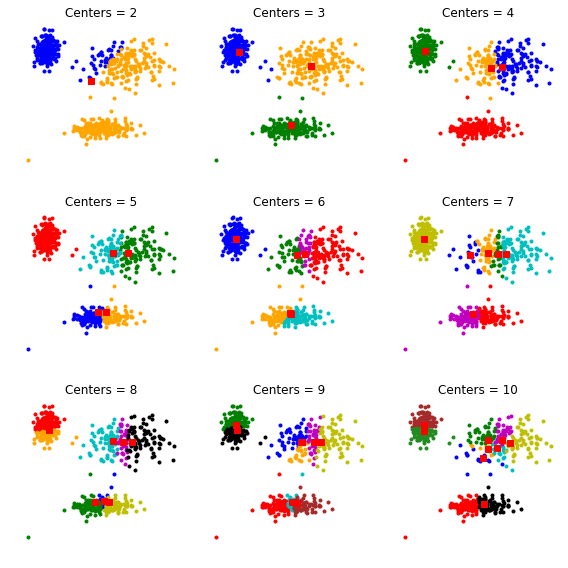

In [12]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts)).T

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, U, T, obj_fcn = pfcm(alldata, ncenters)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(U, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}'.format(ncenters))
    ax.axis('off')

fig1.tight_layout()

Regenerate fuzzy model with 3 cluster centers - note that center ordering is random in this clustering algorithm, so the centers may change places

In [13]:
cntr, U, T, obj_fcn = pfcm(alldata, 3)

Show 3-cluster model

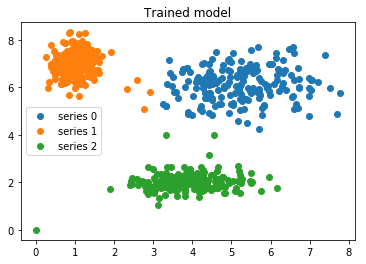

In [15]:
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
for j in range(3):
    ax2.plot(alldata.T[0, np.argmax(U, axis=0) == j],
             alldata.T[1, np.argmax(U, axis=0) == j], 'o',
             label='series ' + str(j))
ax2.legend()

Generate uniformly sampled data spread across the range [0, 10] in x and 


In [16]:
newdata = np.random.uniform(0, 1, (1100, 2)) * 10

Predict new cluster membership with `pfcm_predict` as well as `cntr` from the 3-cluster model

In [17]:
new_cntr, U, T, obj_fcn = pfcm_predict(newdata, cntr)

Plot the classified uniform data. Note for visualization the maximum membership value has been taken at each point (i.e. these are hardened, not fuzzy results visualized) but the full fuzzy result is the output from `pfcm_predict`.

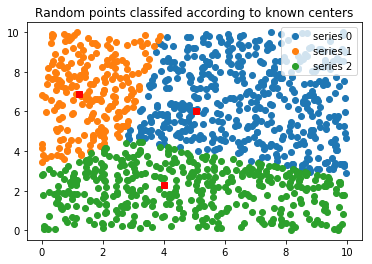

In [18]:
cluster_membership = np.argmax(U, axis=0)  # Hardening for visualization

fig3, ax3 = plt.subplots()
ax3.set_title('Random points classifed according to known centers')
for j in range(3):
    ax3.plot(newdata[cluster_membership == j, 0],
             newdata[cluster_membership == j, 1], 'o',
             label='series ' + str(j))
for pt in cntr:
    ax3.plot(pt[0], pt[1], 'rs')
# for pt in new_cntr:
    # ax3.plot(pt[0], pt[1], 'bs')
ax3.legend()

plt.show()